#### Links to stuff I used 

I used the XGbooster model like here and it worked
- https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [2]:
# %% Imports
from utils import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\MJAR0016\Desktop\data_4_SHAP.csv')
df.head(6)

,Video_Name,Type,Openface_gaze_child,Fer_emotions_child,hand_left_x_adult,hand_left_y_adult,hand_right_x_adult,hand_right_y_adult,head_x_adult,head_y_adult,hand_left_x_child,hand_left_y_child,hand_right_x_child,hand_right_y_child,head_x_child,head_y_child,Total_video_red_head,Total_video_red_body
0,2023_CFLH,Control,0.367,0.001799,0.127726,0.048561,0.122745,0.050315,0.099885,0.034279,0.200317,0.096824,0.082856,0.097622,0.182887,0.057123,0.000000,0.000000
1,2025_SRF,Control,0.374,0.203160,0.247773,0.211057,0.218768,0.214073,0.198482,0.149894,0.049753,0.028589,0.037262,0.029972,0.048221,0.026176,0.000000,0.000099
2,2048_VMY,Control,0.485,0.007679,0.149614,0.108114,0.176780,0.087354,0.124731,0.054382,0.153328,0.101382,0.054481,0.105798,0.130008,0.073737,0.000048,0.000192
3,2053_HCK,Control,0.377,0.002789,0.067173,0.034553,0.072553,0.032087,0.062592,0.033870,0.115682,0.067241,0.088655,0.070538,0.116464,0.054508,0.000000,0.000000
4,2055_CP,Control,0.329,0.022569,0.215708,0.257767,0.234966,0.258505,0.185188,0.198978,0.197849,0.152850,0.095717,0.149772,0.166600,0.102052,0.000000,0.000000
5,2056_AB,Control,0.126,0.017298,0.254321,0.137887,0.279376,0.129771,0.191501,0.097130,0.138887,0.064735,0.116654,0.065746,0.128286,0.056265,0.000000,0.000284


In [189]:
### delete ro no 5 because the child is autistic not a control patient :) 

df = df.drop(5)

In [6]:
df.head(6)

,Video_Name,Type,Openface_gaze_child,Fer_emotions_child,hand_left_x_adult,hand_left_y_adult,hand_right_x_adult,hand_right_y_adult,head_x_adult,head_y_adult,hand_left_x_child,hand_left_y_child,hand_right_x_child,hand_right_y_child,head_x_child,head_y_child,Total_video_red_head,Total_video_red_body
0,2023_CFLH,Control,0.367,0.001799,0.127726,0.048561,0.122745,0.050315,0.099885,0.034279,0.200317,0.096824,0.082856,0.097622,0.182887,0.057123,0.000000,0.000000
1,2025_SRF,Control,0.374,0.203160,0.247773,0.211057,0.218768,0.214073,0.198482,0.149894,0.049753,0.028589,0.037262,0.029972,0.048221,0.026176,0.000000,0.000099
2,2048_VMY,Control,0.485,0.007679,0.149614,0.108114,0.176780,0.087354,0.124731,0.054382,0.153328,0.101382,0.054481,0.105798,0.130008,0.073737,0.000048,0.000192
3,2053_HCK,Control,0.377,0.002789,0.067173,0.034553,0.072553,0.032087,0.062592,0.033870,0.115682,0.067241,0.088655,0.070538,0.116464,0.054508,0.000000,0.000000
4,2055_CP,Control,0.329,0.022569,0.215708,0.257767,0.234966,0.258505,0.185188,0.198978,0.197849,0.152850,0.095717,0.149772,0.166600,0.102052,0.000000,0.000000
6,2061_MFI,Control,0.391,0.244881,0.223700,0.256117,0.250655,0.247896,0.178263,0.207833,0.110339,0.018701,0.045354,0.018782,0.087884,0.018023,0.000149,0.000564


In [4]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

with open(r'C:\Users\MJAR0016\Desktop\data_4_SHAP.csv') as f:
 X = pd.read_csv(f,usecols=['Openface_gaze_child' ,'Fer_emotions_child', 'hand_left_x_adult', 'hand_left_y_adult','hand_right_x_adult','hand_right_y_adult','head_x_adult','head_y_adult','hand_left_x_child','hand_left_y_child','hand_right_x_child','hand_right_y_child','head_x_child','head_y_child'])
f.close()
X.head(10)
y = df['Total_video_red_head']


X.drop(5)

,Openface_gaze_child,Fer_emotions_child,hand_left_x_adult,hand_left_y_adult,hand_right_x_adult,hand_right_y_adult,head_x_adult,head_y_adult,hand_left_x_child,hand_left_y_child,hand_right_x_child,hand_right_y_child,head_x_child,head_y_child
0,0.367,0.001799,0.127726,0.048561,0.122745,0.050315,0.099885,0.034279,0.200317,0.096824,0.082856,0.097622,0.182887,0.057123
1,0.374,0.203160,0.247773,0.211057,0.218768,0.214073,0.198482,0.149894,0.049753,0.028589,0.037262,0.029972,0.048221,0.026176
2,0.485,0.007679,0.149614,0.108114,0.176780,0.087354,0.124731,0.054382,0.153328,0.101382,0.054481,0.105798,0.130008,0.073737
3,0.377,0.002789,0.067173,0.034553,0.072553,0.032087,0.062592,0.033870,0.115682,0.067241,0.088655,0.070538,0.116464,0.054508
4,0.329,0.022569,0.215708,0.257767,0.234966,0.258505,0.185188,0.198978,0.197849,0.152850,0.095717,0.149772,0.166600,0.102052
6,0.391,0.244881,0.223700,0.256117,0.250655,0.247896,0.178263,0.207833,0.110339,0.018701,0.045354,0.018782,0.087884,0.018023
7,0.311,0.548663,0.128139,0.047613,0.106773,0.047972,0.107496,0.046903,0.073602,0.043338,0.045568,0.042124,0.081515,0.027794
8,0.201,0.076408,0.087277,0.016398,0.059888,0.014946,0.077334,0.028200,0.126315,0.035498,0.137088,0.036310,0.146035,0.040084
9,0.072,0.383760,0.165479,0.096754,0.168024,0.093497,0.139348,0.077190,0.130614,0.049687,0.101119,0.049716,0.112938,0.042344
10,0.149,0.057942,0.055362,0.015610,0.045515,0.012421,0.052132,0.041264,0.178520,0.015558,0.200816,0.017681,0.187164,0.019307


In [5]:
y.drop(5)

0     0.000000
1     0.000000
2     0.000048
3     0.000000
4     0.000000
6     0.000149
7     0.000050
8     0.000397
9     0.000065
10    0.000199
11    0.000000
12    0.000000
13    0.000064
14    0.000234
15    0.000296
16    0.000354
17    0.000658
Name: Total_video_red_head, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [7]:
X.head()
y_test

11    0.000000
2     0.000048
4     0.000000
10    0.000199
Name: Total_video_red_head, dtype: float64

In [34]:
import xgboost as xgb
import shap

#model = xgboost.XGBRegressor()
#model.fit(X_train, y_train)

In [16]:
#model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X_train, y_train)

In [26]:
#explainer = shap.Explainer(model_xgb.predict, X_test)
# Calculates the SHAP values - It takes some time
#shap_values = explainer(X_test)

In [35]:
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=10)
model_ebm.fit(X_train, y_train)

ExplainableBoostingRegressor()

In [36]:

explainer_ebm = shap.Explainer(model_ebm.predict, X_test)
shap_values = explainer_ebm(X_test)



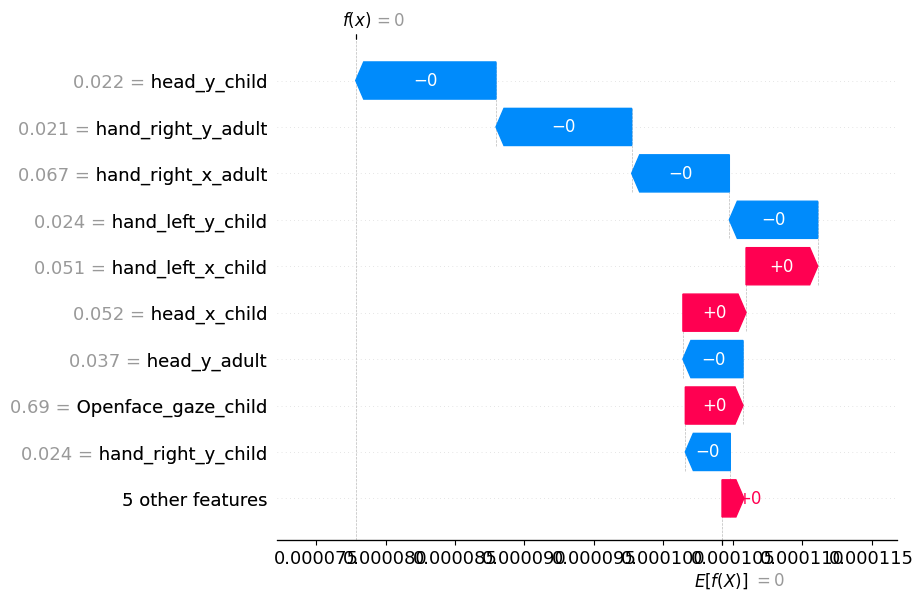

In [37]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [12]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

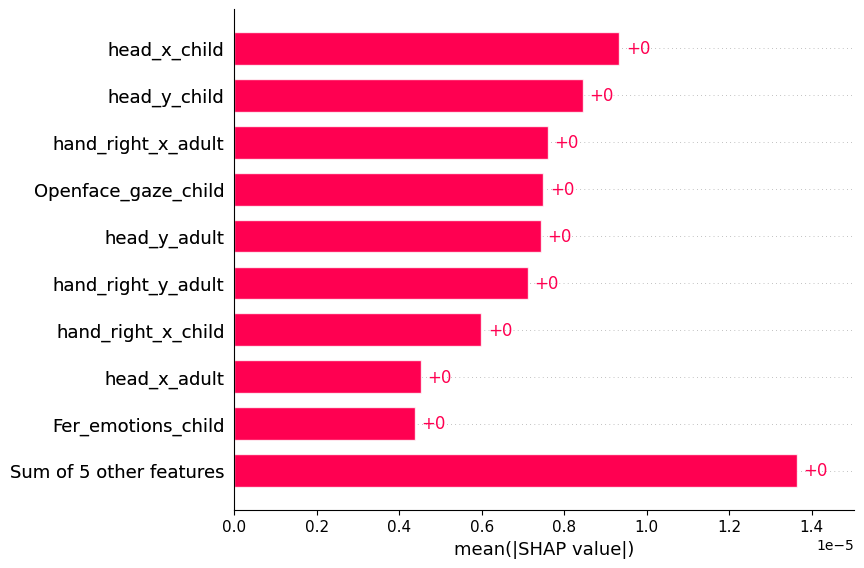

In [38]:
shap.plots.bar(shap_values)

In [17]:
shap.initjs()
# visualize all the training set predictions
shap.plots.force(shap_values)

In [28]:
shap.initjs()

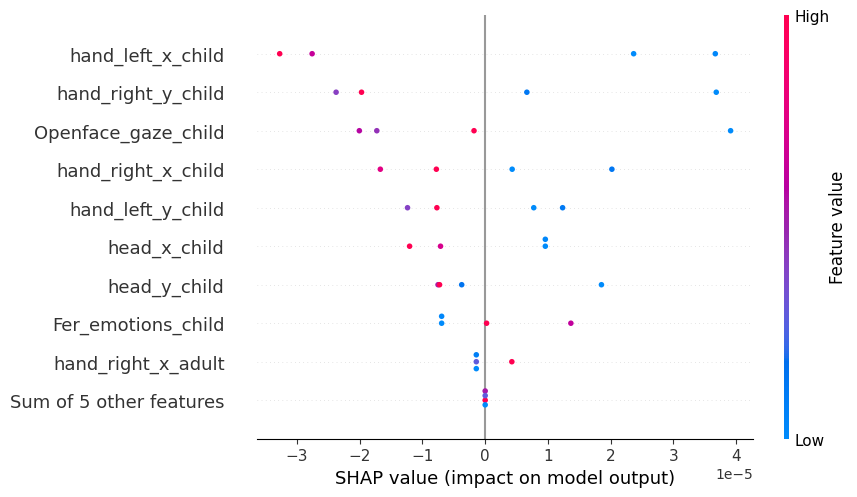

In [137]:
# summarize the effects of all the features
shap.initjs()
shap.plots.beeswarm(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


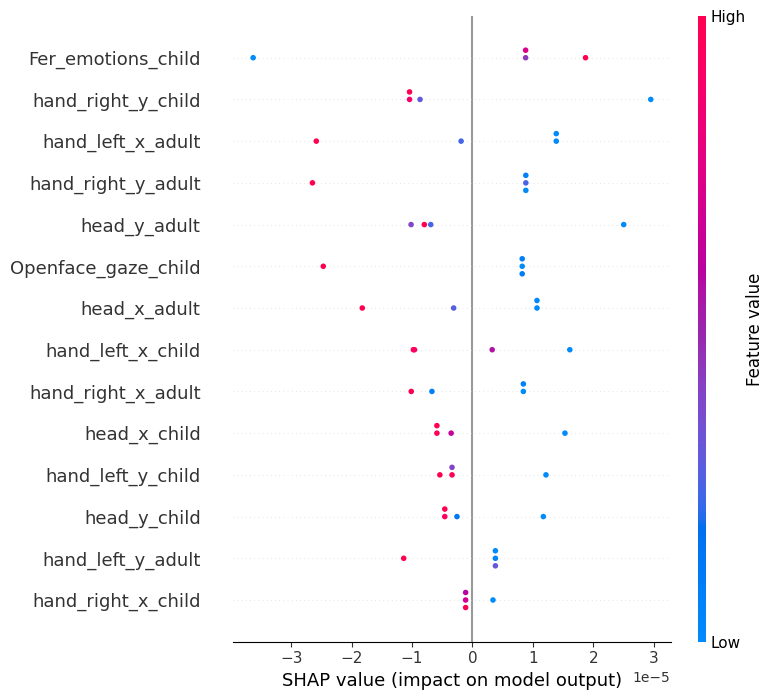

In [30]:
shap.summary_plot(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


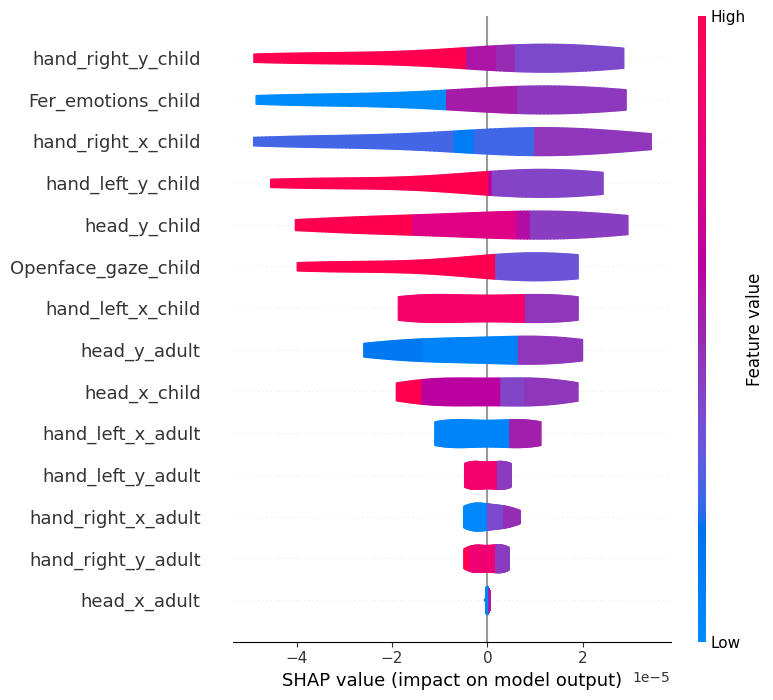

In [108]:
shap.summary_plot(shap_values, plot_type='violin')

### MORE GRAPHS FOR TORAL VIDEO RED BODY

- the equivalent of the notebook MORE_SHAP_rF but with XGboost

<AxesSubplot: >

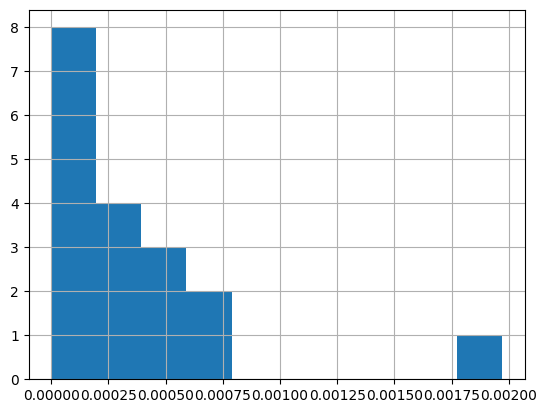

In [32]:
import pandas as pd
import numpy as np
import plotly
np.random.seed(0)
import matplotlib.pyplot as plt

df['Total_video_red_body'].hist()

In [34]:
print(model.feature_importances_)

NameError: name 'model' is not defined

In [35]:
importances = model.feature_importances_
indices = np.argsort(importances)


NameError: name 'model' is not defined

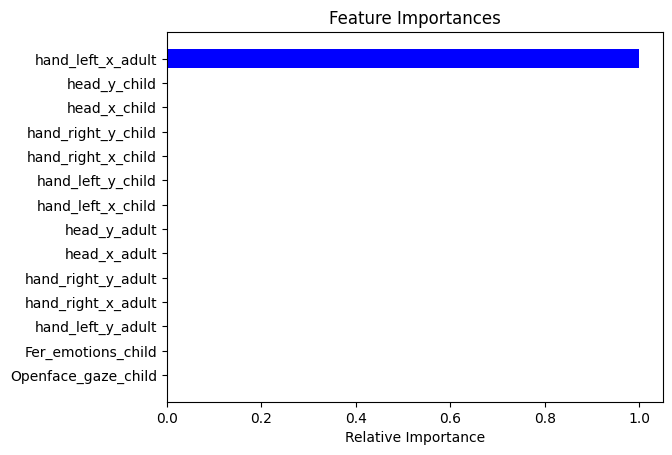

In [56]:
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### GRAPHS FOR TOTAL_VIDEO_RED_HEAD

In [70]:
# %% Imports
from utils import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\MJAR0016\Desktop\data_4_SHAP.csv')
df.head()

import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

with open(r'C:\Users\MJAR0016\Desktop\data_4_SHAP.csv') as f:
 X = pd.read_csv(f,usecols=['Openface_gaze_child' ,'Fer_emotions_child', 'hand_left_x_adult', 'hand_left_y_adult','hand_right_x_adult','hand_right_y_adult','head_x_adult','head_y_adult','hand_left_x_child','hand_left_y_child','hand_right_x_child','hand_right_y_child','head_x_child','head_y_child'])
f.close()
X.head(10)
y = df['Total_video_red_head']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [71]:
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X_train, y_train)

explainer_ebm = shap.Explainer(model_ebm.predict, X_test)
shap_values = explainer_ebm(X_test)


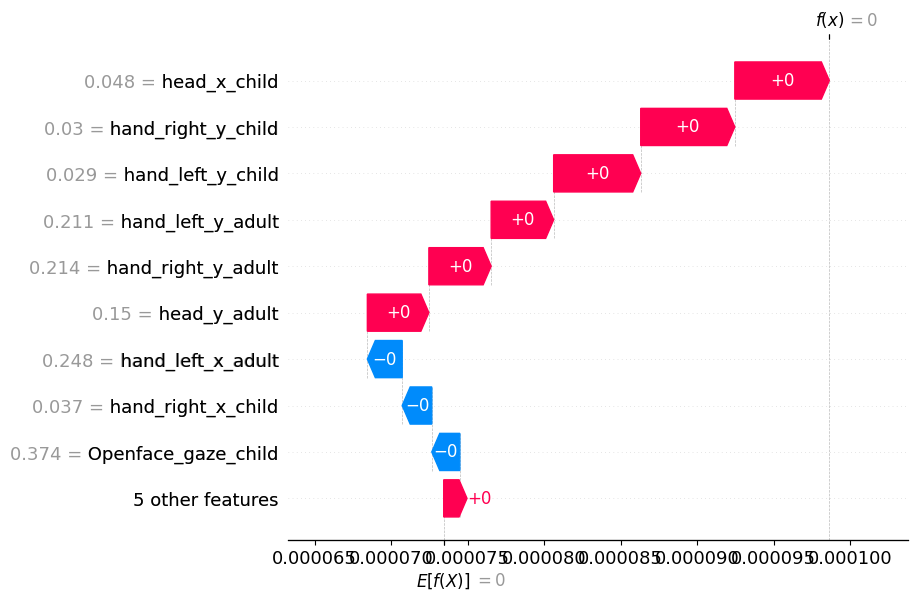

In [72]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [73]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

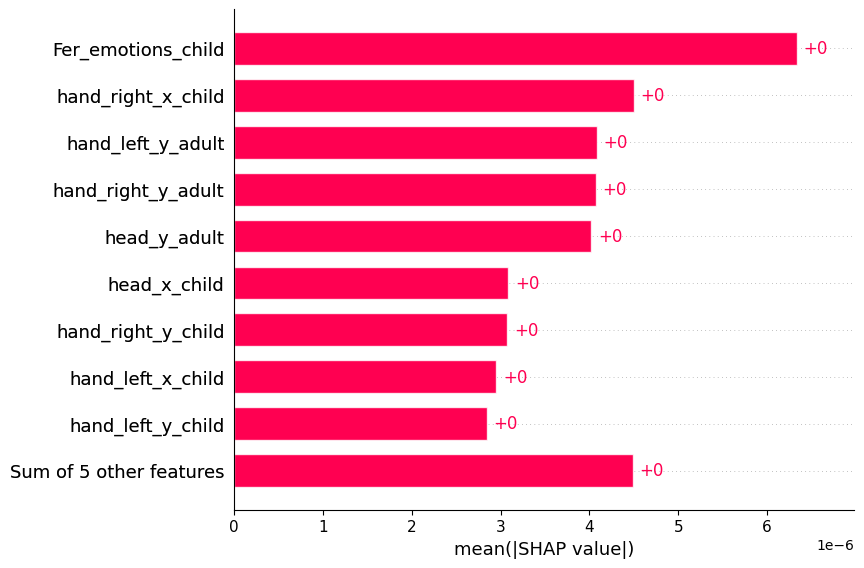

In [74]:
shap.plots.bar(shap_values)

In [75]:
shap.initjs()
# visualize all the training set predictions
shap.plots.force(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


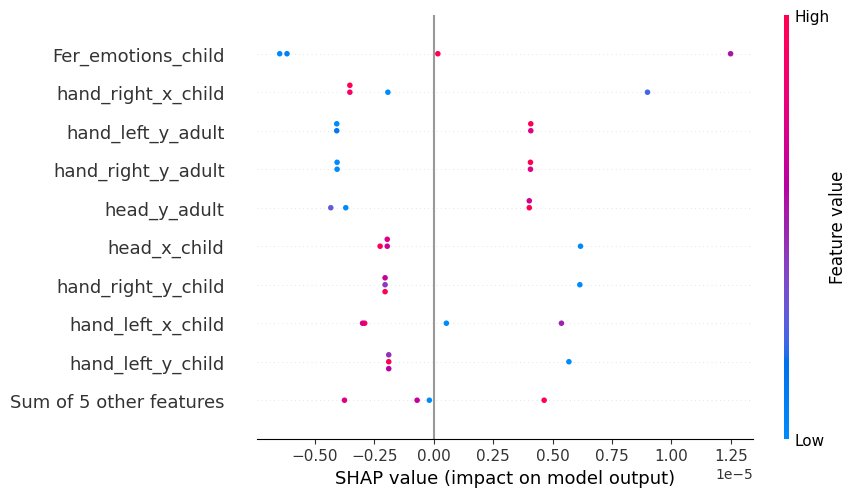

In [76]:
# summarize the effects of all the features
shap.initjs()
shap.plots.beeswarm(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


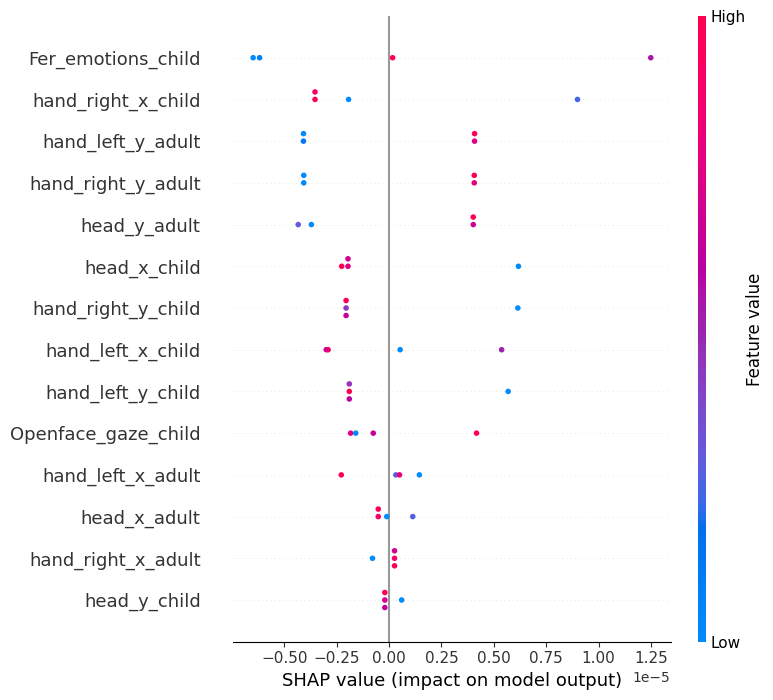

In [77]:
shap.summary_plot(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


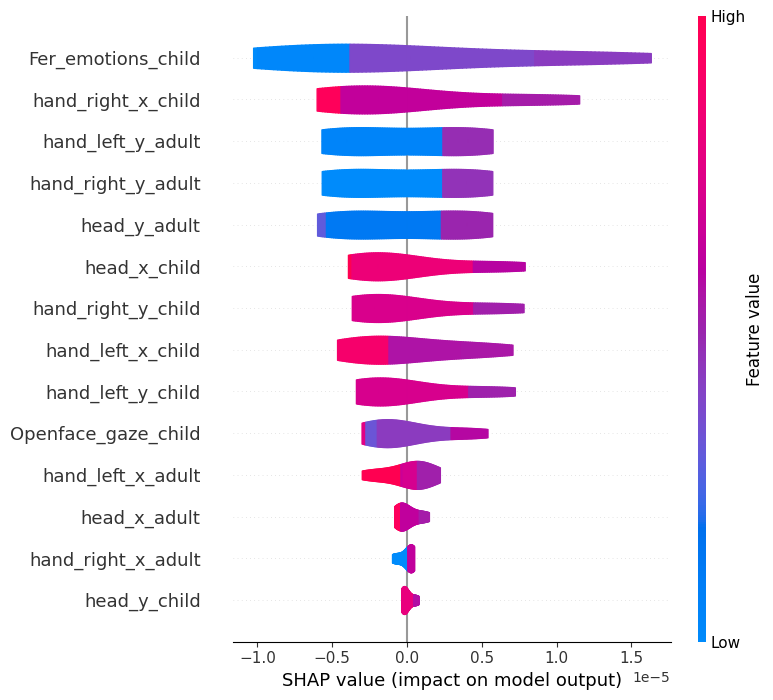

In [78]:
shap.summary_plot(shap_values, plot_type='violin')